In [18]:
#  library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score

from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [19]:
# Load dataset
df=pd.read_csv('Prostate_Cancer.csv')
df.head(10)


,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
5,6,B,25,25,83,477,0.128,0.170,0.209,0.076
6,7,M,16,26,120,1040,0.095,0.109,0.179,0.057
7,8,M,15,18,90,578,0.119,0.165,0.220,0.075
8,9,M,19,24,88,520,0.127,0.193,0.235,0.074
9,10,M,25,11,84,476,0.119,0.240,0.203,0.082


In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [21]:
df.isna().sum()


id                   0
diagnosis_result     0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
dtype: int64

M    62
B    38
Name: diagnosis_result, dtype: int64


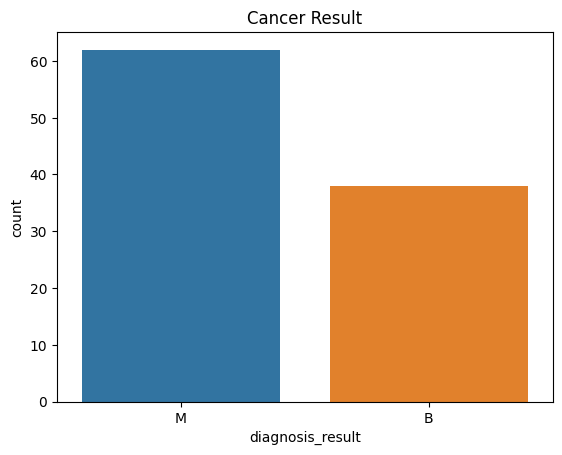

In [22]:
# target variable distribution
print(df.diagnosis_result.value_counts())
sns.countplot(x = df.diagnosis_result)
plt.title("Cancer Result")
plt.show()

In [23]:
df=df.replace({'diagnosis_result':{'M':1,'B':0}})


In [24]:
# data splitting in X,y
x = df[['radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension']]
y = df['diagnosis_result']

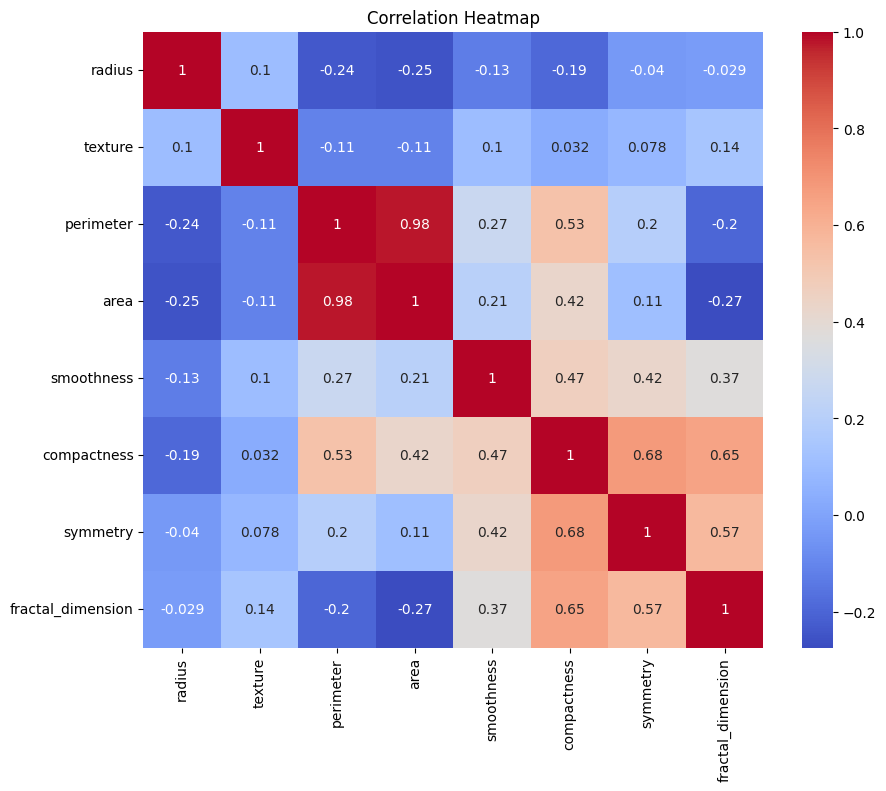

In [25]:
correlation_matrix = x.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [27]:

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(X_train,y_train)
y_pred_kn = kn.predict(X_test)

In [28]:
radius = 50  # Adjust this value as needed
# outlier_label = -1  # Label for outliers
clf = RadiusNeighborsClassifier(radius=radius)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred_rnn = clf.predict(X_test)

In [29]:


class_rep_kn = classification_report(y_test, y_pred_kn)
class_rep_rnn = classification_report(y_test,y_pred_rnn)

print("KNeighbors Classifier: \n", class_rep_kn)
print("RNN Classifier: \n", class_rep_rnn)

KNeighbors Classifier: 
               precision    recall  f1-score   support

           0       0.55      0.75      0.63         8
           1       0.89      0.77      0.83        22

    accuracy                           0.77        30
   macro avg       0.72      0.76      0.73        30
weighted avg       0.80      0.77      0.78        30

RNN Classifier: 
               precision    recall  f1-score   support

           0       0.46      0.75      0.57         8
           1       0.88      0.68      0.77        22

    accuracy                           0.70        30
   macro avg       0.67      0.72      0.67        30
weighted avg       0.77      0.70      0.72        30



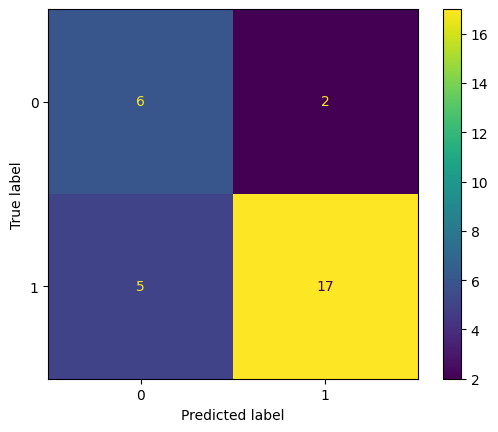

In [30]:
#  Confusion Matrix
cm1 = confusion_matrix(y_test, y_pred_kn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot()
plt.show()

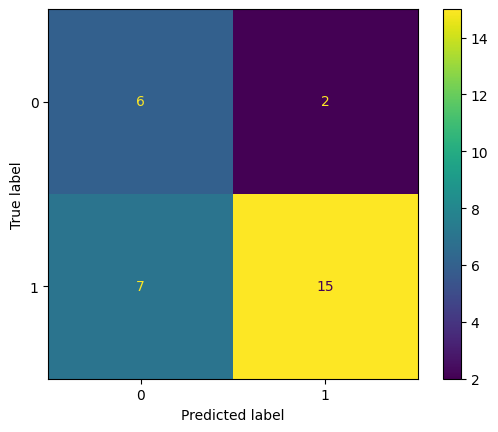

In [31]:
cm1 = confusion_matrix(y_test, y_pred_rnn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot()
plt.show()

In [32]:

accuracy_kn = accuracy_score(y_test, y_pred_kn)
accuracy_rnn = accuracy_score(y_test,y_pred_rnn)

print(f"Accuracy of KNN: {accuracy_kn:.2f}")
print(f"Accuracy of RNN: {accuracy_rnn:.2f}")



Accuracy of KNN: 0.77
Accuracy of RNN: 0.70


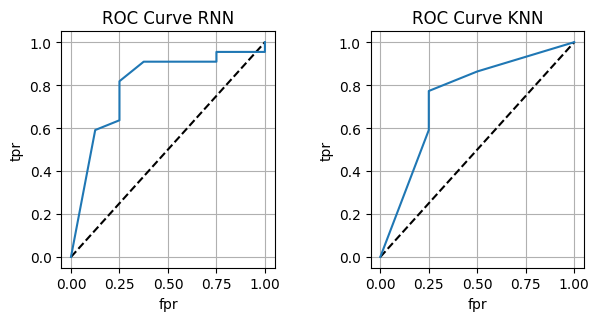

In [33]:
# RNN Classification
Y_predict1_proba = clf.predict_proba(X_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict1_proba)
roc_auc = auc(fpr, tpr)
plt.subplot(335)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label=f'RNN (AUC = {roc_auc:.2f})')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve RNN')
plt.grid(True)


# KNN Classification

Y_predict6_proba = kn.predict_proba(X_test)
Y_predict6_proba = Y_predict6_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict6_proba)
plt.subplot(336)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve KNN')
plt.grid(True)
plt.subplots_adjust(top=2, bottom=0.08, left=0.10, right=1.4, hspace=0.45, wspace=0.45)
plt.show()

